<a href="https://colab.research.google.com/github/guimaraaes/data-science/blob/master/analise_exploratoria-google_play_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore') 


#DESCRIÇÃO DA PROBLEMÁTICA
Esse notebook consiste em descrever os dados dos aplicativos da Google App Store.

>  O database é de dados coletados da web de 10 mil aplicativos da Play Store para análise do mercado Android. 

As variáveis do banco de dados analisado no arquivo *googleplaystore.csv* são:
*   **Category**: a categorial a qual o app pertence;
*   **Rating**: Avaliação dos usuários;
*   **Reviews**: Número de revisões realizadas no app;
*   **Size**: Tamanho do aplicativo;
*   **Installs**: Número de usuários que realizaram instalação do app;
*   **Type**: gratuito ou pago;
*   **Price**: preço do app quando pago;
*   **Content** Rating: Faixa etária à qual o aplicativo é direcionado;
*   **Genres**:Um aplicativo pode pertencer a vários gêneros (além de sua categoria principal). Por exemplo, um jogo musical familiar pertencerá aos gêneros Música, Jogo, Família.












#OBTENÇÃO DOS DADOS
Nessa etapa é descrito duas formas de obter os dados. Deve ser escolhida apenas uma e atentar para quais linhas podem ser executadas sempre ou não.


##Kaggle e Google Drive
> Para realizar esse método é necessário ter uma conta no Kaggle e ter configurado o seu Google Drive para executar o download.


No código a seguir são realizadas as seguintes ações:

1.   conexão com o google drive;

2.   download dos dados obtidos no [Kaggle - Database - Google App Store](https://www.kaggle.com/lava18/google-play-store-apps/notebooks?sortBy=voteCount&group=everyone&pageSize=20&datasetId=49864) para o drive (apenas na primeira vez);

3.   atribuição destes dados à variável *data* com o biblioteca pandas.

In [ ]:
# # 1
# from google.colab import drive
# drive.mount('/content/gdrive')
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# %cd /content/gdrive/My Drive/Kaggle/google-play-store/

# # 2
# #descomentar apenas para o primeiro download
# # ! kaggle datasets download -d lava18/google-play-store-apps
# # !unzip \*.zip  && rm *.zip

# # 3
# data=pd.read_csv('/content/gdrive/My Drive/Kaggle/google-play-store/googleplaystore.csv')
# data_user_reviews=pd.read_csv('/content/gdrive/My Drive/Kaggle/google-play-store/googleplaystore_user_reviews.csv')

## GitHub

Além disso, também disponibilizei uma cópia dos dados do Kaggle no meu GitHub.



In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/guimaraaes/data-science/master/data/google-play-store/googleplaystore.csv')
data_user_reviews = pd.read_csv('https://raw.githubusercontent.com/guimaraaes/data-science/master/data/google-play-store/googleplaystore_user_reviews.csv')

# TRATAMENTO DOS DADOS

Nessa etapa são realizadas diversas análises para conseguir identificar quais modificações podem ser realizadas nos dados para conseguir manipular eles e adquirir *insights*. Primeiro observamos que o DataFrame *data* é composto de 13 variáveis e 10841 dados enquanto o DataFrame *data_user_reviews* é composto de 5 variáveis e 64295,



In [ ]:
print('Dimensão do DataFrame data')
print("variáveis: ", data.shape[1])
print("dados:     ", data.shape[0])

print('Dimensão do DataFrame data_user_reviews')
print("variáveis: ", data_user_reviews.shape[1])
print("dados:     ", data_user_reviews.shape[0])


Dimensão do DataFrame data
variáveis:  13
dados:      10841
Dimensão do DataFrame data_user_reviews
variáveis:  5
dados:      64295


##DataFrame *data_user_reviews* 
Os primeiros cinco dados do DataFrame *data_user_reviews* são

In [ ]:
data_user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Observamos também o tipo das variáveis,

In [ ]:
data_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


As primeiras modificações que iremos realizar vai ser transformar os dados de para um tipo de dado mais convencional. Assim vamos converter as variáveis do tipo *object* para *string*.

In [ ]:
data_user_reviews['App'] = data_user_reviews['App'].convert_dtypes()
data_user_reviews['Translated_Review'] = data_user_reviews['Translated_Review'].convert_dtypes()
data_user_reviews['Sentiment'] = data_user_reviews['Sentiment'].convert_dtypes()
# data_user_reviews.info()

Verificando a percentagem da quantidade de variáveis que são nulas percebemos que uma percentagem igual para as quatro últimas variáveis.

In [ ]:
data_user_reviews.isnull().mean()*100

App                        0.000000
Translated_Review         41.788631
Sentiment                 41.780854
Sentiment_Polarity        41.780854
Sentiment_Subjectivity    41.780854
dtype: float64

Listando em uma variável null_data uma seleção do DataFrame data_user_review onde as quantro últimas variáveis são nulas temos um conjunto de dados com valores nulos. Como não conseguiremos recuperar esses dados ou aproveitar outras variáveis, vamos excluí-los do DataFrame.

In [ ]:
null_data = data_user_reviews[data_user_reviews['Translated_Review'].isnull() & data_user_reviews['Sentiment'].isnull() &
                  data_user_reviews['Sentiment_Polarity'].isnull() & data_user_reviews['Sentiment_Subjectivity'].isnull() ]
null_data

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,<NA>,<NA>,NaN,NaN
7,10 Best Foods for You,<NA>,<NA>,NaN,NaN
15,10 Best Foods for You,<NA>,<NA>,NaN,NaN
102,10 Best Foods for You,<NA>,<NA>,NaN,NaN
107,10 Best Foods for You,<NA>,<NA>,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,<NA>,<NA>,NaN,NaN
64291,Houzz Interior Design Ideas,<NA>,<NA>,NaN,NaN
64292,Houzz Interior Design Ideas,<NA>,<NA>,NaN,NaN
64293,Houzz Interior Design Ideas,<NA>,<NA>,NaN,NaN


Visualizando os valores nulos do novo DataFrame temos,

In [ ]:
data_user_reviews.drop(list(null_data.index), inplace=True)
data_user_reviews.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Os valores nulos para a variável *Translated_Review* são aceitáveis, pois trata-se apenas do *feedback* do usuário em forma de texto. Verificando agora os tipos únicos de dado para cada variável temos que *Sentiment* é uma variável categórica, pois apresenta apenas 3 valores únicos.

In [ ]:
data_user_reviews.nunique()

App                         865
Translated_Review         27994
Sentiment                     3
Sentiment_Polarity         6195
Sentiment_Subjectivity     4530
dtype: int64

Os valores assumidos na variável *Sentiment* são

In [ ]:
data_user_reviews['Sentiment'].unique()

<StringArray>
['Positive', 'Neutral', 'Negative']
Length: 3, dtype: string

##DataFrame *data* 
Observamos os primeiros dados do DataFrame *data*,


In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Observamos também o tipo das variáveis,

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


As primeiras modificações que iremos realizar vai ser transformar os dados de *object* para um tipo de dado mais convencional como *int*, *float* ou *string*. Inicialmente convertemos as variáveis para *string*.

In [ ]:
data['App'] = data['App'].convert_dtypes()
data['Category'] = data['Category'].convert_dtypes()

data['Type'] = data['Type'].convert_dtypes()
data['Content Rating'] = data['Content Rating'].convert_dtypes()
data['Genres'] = data['Genres'].convert_dtypes()

data['Current Ver'] = data['Current Ver'].convert_dtypes()
data['Android Ver'] = data['Android Ver'].convert_dtypes()

Ao tentarmos transformar as variáveis em *float* percebemos que a transformação para *Rating* apresenta um erro em dados com valor de '3.0M', analisando esses dados percebemos que consiste em uma única célula onde as colunas parecem ter sido preenchidas erradas com uma defasagem. 

In [ ]:
data[data['Reviews']=='3.0M']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,<NA>,"February 11, 2018",1.0.19,4.0 and up,<NA>


Por ser apenas um dado, apagamos ele do DataFrame,

In [ ]:
data.drop(index=10472, inplace=True)
print("total de linhas restantes: ", data.shape[0])

total de linhas restantes:  10840


A seguir são realizadas modificações para obter algumas variáveis para tipo numérico. Além disso, algumas dessas modificações envolveram operações com *string* para poder tornar o valor em *int* ou *float*,

*   Na variável Price foi removido o caractere $;
*   Na variável Size foi criado um array com a dimensão correspondente para k ou M. Estes foram removidos da variável data que foi convertida para um valor numérico e multiplicada pela dimensão correspondente;
*   Por fim, na variável Installs foi removido o caractere + e , para converter o valor para um float.

Assim, finalizamos a conversão de todos as variáveis desejadas.



In [ ]:
data['Reviews'] = data['Reviews'].astype(float)
data['Rating'] = data['Rating'].astype(float)

data['Price'] = data['Price'].str.replace('$', '')
data['Price'].unique()
data['Price'] = data['Price'].astype(float)

escale=[]
for i in data['Size']:
  if 'k' in i:
    escale=np.append(escale, [1000])
  elif 'M' in i:
    escale=np.append(escale, [1000000])
  else:
    escale=np.append(escale, [0])
# len(escale)
data['Size'] = data['Size'].str.replace('M', '')
data['Size'] = data['Size'].str.replace('k', '')
data['Size'] = data['Size'].str.replace('Varies with device', '0')
data['Size'] = (np.multiply(data['Size'].astype(float), escale)).astype(int)

data['Installs'] = data['Installs'].str.replace('+', '')
data['Installs'] = data['Installs'].str.replace(',', '')
data['Installs'] = data['Installs'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  string 
 1   Category        10840 non-null  string 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  int64  
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  string 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  string 
 9   Genres          10840 non-null  string 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  string 
 12  Android Ver     10838 non-null  string 
dtypes: float64(4), int64(1), object(1), string(7)
memory usage: 1.2+ MB


Por curiosidade verificamos de modo rápido se há alguma inconsistência entre a variável *Type* ou *Price*, realizados o código a seguir.

In [ ]:
data[(data['Type'] == 'Free') & (data['Price'] > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Verificamos também os valores únicos para cada variável no intuito de conseguir obter variáveis categóricas. A seguir vão ser manipuladas algumas variáveis que apresentaram valores baixos para o método *nunique()*.

In [ ]:
data.nunique()

App               9659
Category            33
Rating              39
Reviews           6001
Size               460
Installs            20
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1377
Current Ver       2831
Android Ver         33
dtype: int64

Para a variável *Type*,

In [ ]:
data['Type'].unique()

<StringArray>
['Free', 'Paid', <NA>]
Length: 3, dtype: string

Obtendo os valores do DataFrame onde a variável *Type* é nula temos um único dado,

In [ ]:
data[(data['Type'].isnull()) ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0.0,0,0.0,<NA>,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Pelo dado já percebemos que tanto o valor de *Type* como de *Rating* não são definidos, daí vamos atribuir o valor de *Free* para o *Type*, pois o *Price* é 0.0 e para o *Rating* vamos atribuir o valor da mediana.

In [ ]:
data.loc[(data['Type'].isnull()), 'Type']  = "Free"
data.loc[(data['Rating'].isnull()), 'Rating']  = data['Rating'].median()

Novamente obtemos os valores únicos para a variável *Type* e verificamos a existência de apenas duas classes, *Free* e *Paid*.

In [ ]:
data['Type'].unique()

<StringArray>
['Free', 'Paid']
Length: 2, dtype: string

Obtendo agora os valores únicos para a variável *Content Rating* temos,

In [ ]:
data['Content Rating'].unique()

<StringArray>
['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Adults only 18+',
 'Unrated']
Length: 6, dtype: string

Para diminuir a quantidade de variável vamos agrupar aquelas que possuem mais similaridade e obtemos apenas duas classes para esta variável, ou seja,

In [ ]:
data.loc[(data['Content Rating'] == 'Unrated'), 'Content Rating']  = "Everyone"
data.loc[(data['Content Rating'] == 'Teen'), 'Content Rating']  = "Everyone 10+"
data.loc[(data['Content Rating'] == 'Mature 17+'), 'Content Rating']  = "Adults only 18+"
data['Content Rating'].unique()

<StringArray>
['Everyone', 'Everyone 10+', 'Adults only 18+']
Length: 3, dtype: string

Por fim, verificamos a porcentagem dos valores nulos para cada variável, a maior taxa (13,59%) é para a variável *Rating*. Quando realizamos a descrição dos dados vamos também preencher esses valores.

In [ ]:
data.isnull().mean()

App               0.000000
Category          0.000000
Rating            0.000000
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000000
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
Current Ver       0.000738
Android Ver       0.000185
dtype: float64

#DESCRIÇÃO DOS DADOS

Nessa etapa vamos descrever os dados para conseguir entender e obter análises quantitativas do DataFrame. Essa descrição é realizada diante das variáveis numéricas, categóricas e de identificação, além de analisar a correlação dos dados. 



##Variáveis numéricas



###DataFrame *data_user_reviews*
Inicialmente utilizamos o método *hist()* do pandas onde percebemos que as variávei *Sentiment_Polarity* tem variáção entre -1 e 1, sua distribuição é maior em 0.0 e em valores positivos. Já *Sentiment_Subjectivity* tem variação entre 0 e 1, com distribuição maior em 0.5, mas também com distribuição considerável em 0.0.

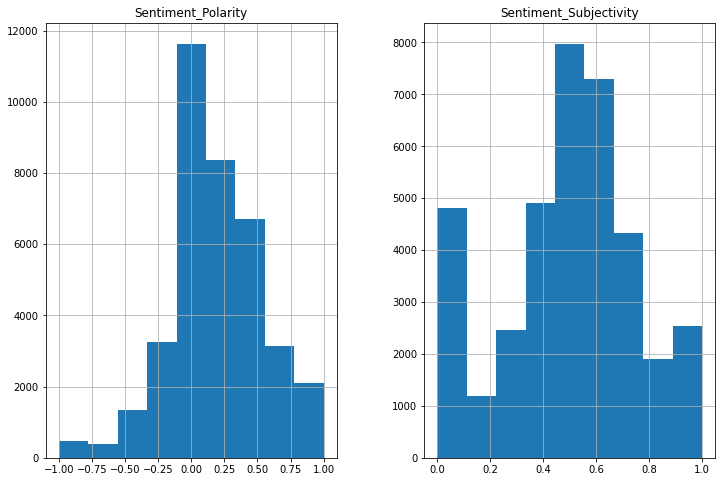

In [ ]:
hist = data_user_reviews.hist(bins=9, figsize=(12,8))

A seguir obtemos também a distribuição da variável categórica *Sentiment* onde percemos que a maioria dos usuário reagiu de forma positiva em relação aos aplicativos e seguindo com reação negativa e neutra.

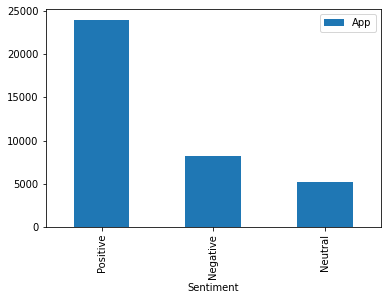

In [ ]:
sentiment = data_user_reviews[['App', 'Sentiment']].groupby('Sentiment').count().sort_values(by='App', ascending=False)
fig = sentiment.plot.bar()

Agora separamos agrupamos pelo tipo da variável *Sentiment* a contagem que cada aplicativo teve em relação aquele sentimento,

In [ ]:
app = pd.DataFrame(data_user_reviews[['Sentiment','App']].groupby(['Sentiment','App']).Sentiment.count())
app.index = app.index.set_names(['Sentiment_Type', 'App'])
# app.reset_index(inplace=True)
# app
app.reset_index(inplace=True)  
app


,Sentiment_Type,App,Sentiment
0,Negative,10 Best Foods for You,10
1,Negative,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1
2,Negative,11st,7
3,Negative,1800 Contacts - Lens Store,6
4,Negative,1LINE – One Line with One Touch,8
...,...,...,...
2371,Positive,Hotels.com: Book Hotel Rooms & Find Vacation D...,39
2372,Positive,Hotspot Shield Free VPN Proxy & Wi-Fi Security,17
2373,Positive,Hotstar,14
2374,Positive,Hotwire Hotel & Car Rental App,16


Separando agora os tipos da variável *Sentiment* em DataFrames específicos, 

In [ ]:
app_negative=app[app['Sentiment_Type'] == 'Negative']
app_neutral=app[app['Sentiment_Type'] == 'Neutral']
app_positive=app[app['Sentiment_Type'] == 'Positive']

Por fim, visualizamos os 10 primeiros aplicativos que tiveram a pior avalização dos usuários e também os 10 primeiros aplicativos que tiveram a melhor avaliação dos usuários.

Text(0.5, 1.0, 'positive')

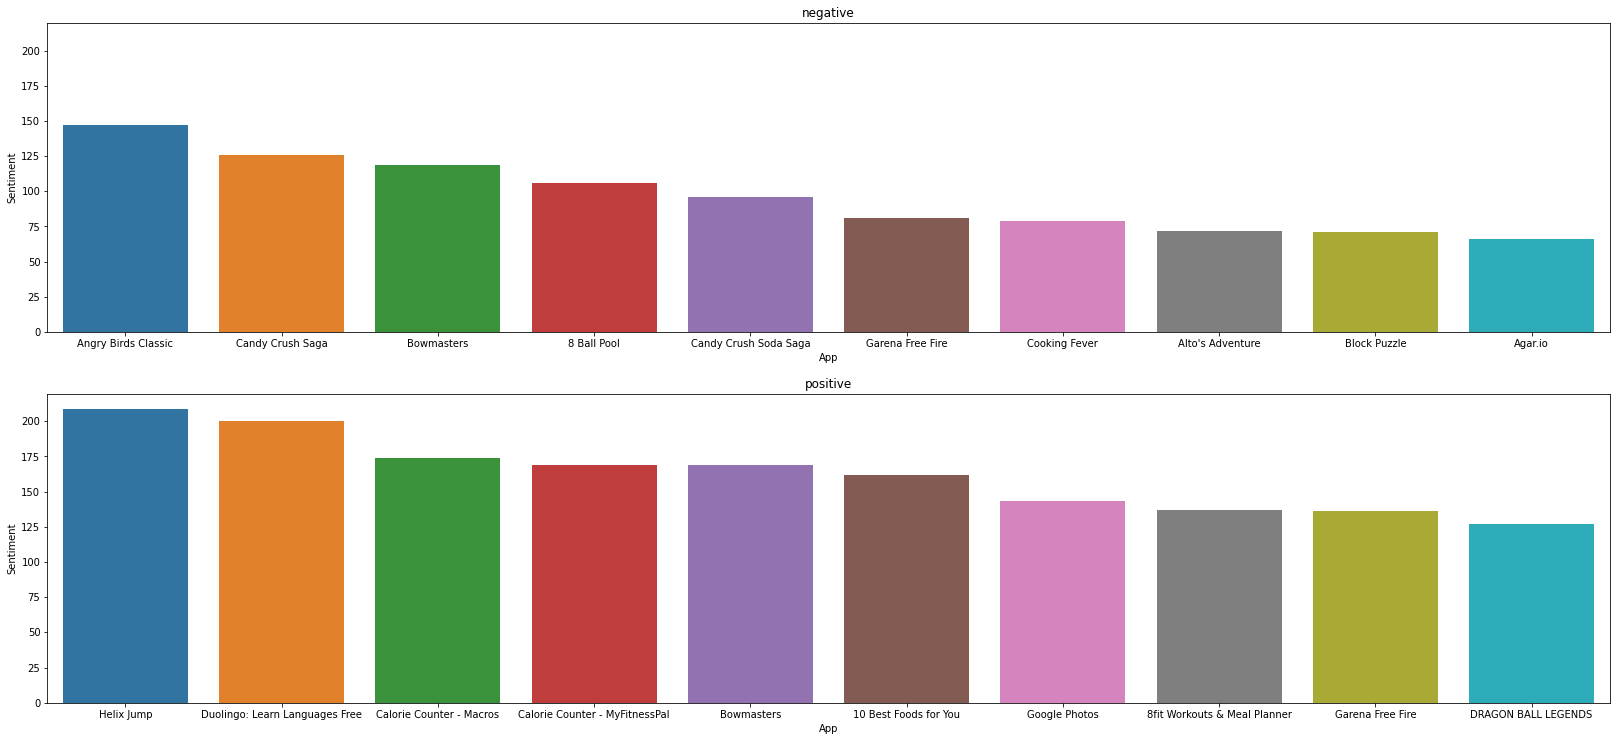

In [ ]:
app_sns_negative = app_negative.sort_values(by='Sentiment',ascending=False).head(10)
app_sns_positive = app_positive.sort_values(by='Sentiment',ascending=False).head(10)

fig, axes = plt.subplots(2, figsize=(28, 4), sharey=True)
fig.subplots_adjust( bottom=.04, top=2.4)
sns.barplot( x=app_sns_negative.App,  y=app_sns_negative.Sentiment,ax=axes[0]).set_title('negative')
sns.barplot(x=app_sns_positive.App,  y=app_sns_positive.Sentiment,ax=axes[1]).set_title('positive')

###DataFrame *data*

Na sequência verificamos também a distribuição dos dados de *data* com o método *hist()*,

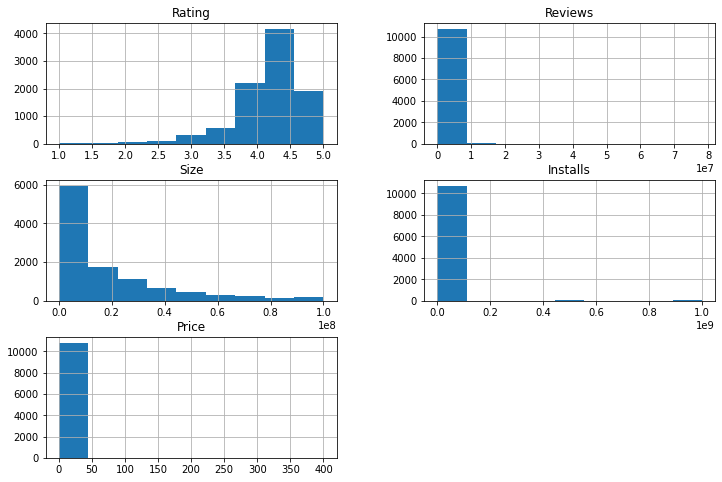

In [ ]:
hist = data.hist(bins=9, figsize=(12,8))

Desse modo, foi possível concluir que para as variáveis podemos destacar as seguintes observações,
*   *Rating*: Apresenta maior concentração em valores próximos de 4, porém, existem variações entre 1 e 5.
*   *Reviews*:Possuem alta variação. Os valores estão entre a casa de 10¹ e 10⁷.
*   *Size*: Também possui alta variação, mas os valores estão concentrados na casa de 10⁶.
*   *Installs*: Apresenta a maior variação de todas as variável.
*   *Price*: Possui variação baixa e a maioria dos valores estão em 0.



##Variáveis categóricas e de identificação

As análises realizadas a seguir buscam relacionar também os dados categóricos e de identificação. Primeiro obtivemos os dez primeiros aplicativos que possuiam maior número de *Installs*,



In [ ]:
data.sort_values(by='Installs', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3896,Subway Surfers,GAME,4.5,27711703.0,76000000,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3943,Facebook,SOCIAL,4.1,78128208.0,0,1.000000e+09,Free,0.0,Everyone 10+,Social,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3523,Google Drive,PRODUCTIVITY,4.4,2731211.0,0,1.000000e+09,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3565,Google Drive,PRODUCTIVITY,4.4,2731211.0,0,1.000000e+09,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
2884,Google Photos,PHOTOGRAPHY,4.5,10859051.0,0,1.000000e+09,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305.0,0,1.000000e+09,Free,0.0,Everyone 10+,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
2853,Google Photos,PHOTOGRAPHY,4.5,10858538.0,0,1.000000e+09,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
4234,Skype - free IM & video calls,COMMUNICATION,4.1,10484169.0,0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384.0,0,1.000000e+09,Free,0.0,Everyone 10+,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device


Os aplicativos ainda foram agrupados pela variável *Category* para obter as dez categorias que possuíam maior agrupamento de aplicativos.

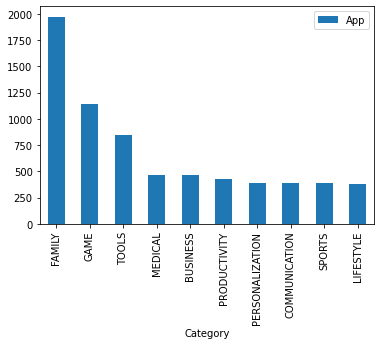

In [ ]:
top10_category = data[['App', 'Category']].groupby('Category').count().sort_values(by='App', ascending=False).head(10)
fig = top10_category.plot.bar()


Já pela contagem dos aplicativos agrupados por *Content Rating* percebemos que os aplicativos livre para todas as faixas etárias estão em maioria, seguidos pelos aplicativos voltados para pessoas maiores de 10 anos e pessoas maiores de 18 anos.

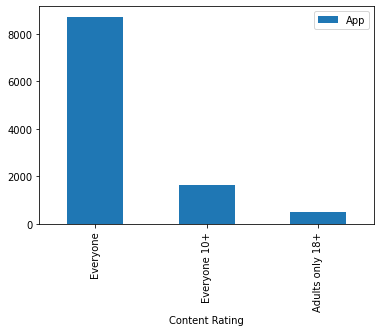

In [ ]:
contentRating = data[['App', 'Content Rating']].groupby('Content Rating').count().sort_values(by='App', ascending=False)
fig = contentRating.plot.bar()

A contagem dos aplicativos pagos e gratuitos mostram que os gratuitos estão em maior quantidade.

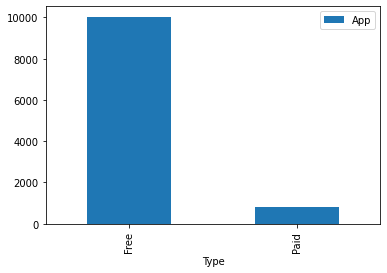

In [ ]:
price = data[['App', 'Type']].groupby('Type').count().sort_values(by='App', ascending=False)
fig = price.plot.bar()

Já em relação a variável *Rating* temos que a maioria dos aplicativos possuem avaliação a partir de 4 estrelas. Ao dividir essa avaliação para os aplicativos pagas e gratuitos na mesma figura percebemos que apesar dos aplicativos pagas estarem em menor número eles estão mais bem avaliados, pois o pico da distribuição destes está a frente do pico da distribuição dos aplicativos gratuitos.

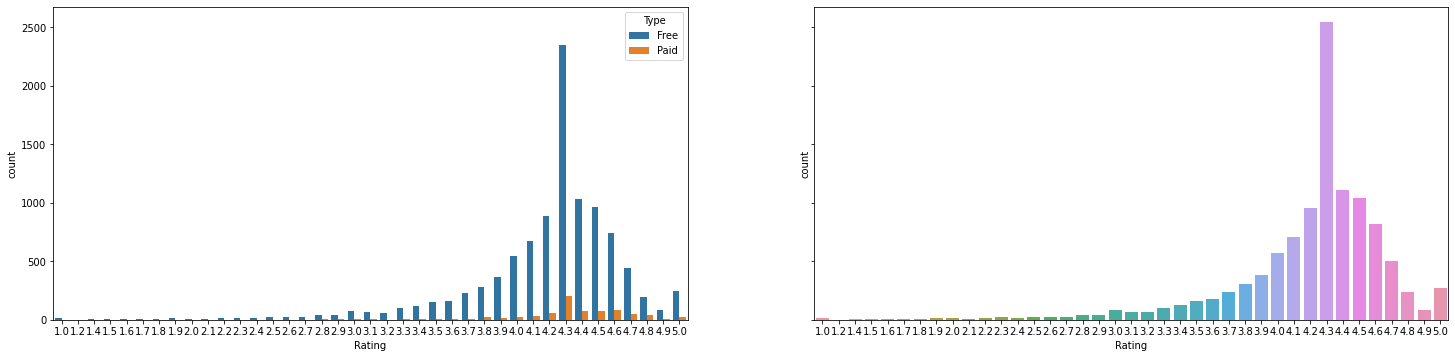

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25, 3), sharey=True)
fig.subplots_adjust( bottom=0.05, top=1.5)
sns.countplot(hue=data.Type, x=data.Rating,ax=axes[0])
sns.countplot(x=data.Rating,ax=axes[1])